# IMPORTAÇÃO DOS DADOS

**Importando as bibliotecas**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Importando o dataset**

Dados obtidos no portal da transparência do senado, pode ser obtido [clicando aqui](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps).
>Ao importar os arquivos .csv, me deparei com o erro 'utf-8 codec can't decode byte 0xf3 in position 213: invalid continuation byte'.  
>Consegui resolver definindo o encoding para 'cp1252', não obtive sucesso com 'latin1' ou 'utf-8'.

In [133]:
ceaps_18 = pd.read_csv('data/despesa_ceaps_2018.csv', sep=';', header=1, encoding='cp1252')
ceaps_19 = pd.read_csv('data/despesa_ceaps_2019.csv', sep=';', header=1, encoding='cp1252')
ceaps_20 = pd.read_csv('data/despesa_ceaps_2020.csv', sep=';', header=1, encoding='cp1252')
ceaps_21 = pd.read_csv('data/despesa_ceaps_2021.csv', sep=';', header=1, encoding='cp1252')

**Unindo os datasets**

In [134]:
ceaps_unido = [ceaps_18, ceaps_19, ceaps_20, ceaps_21]
ceaps = pd.concat(ceaps_unido)
ceaps.reset_index(drop=True)
ceaps.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528


# ANÁLISE DOS DADOS

In [135]:
# Verifica o formato e o tipo dos dados
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                77043 non-null  int64 
 1   MES                77043 non-null  int64 
 2   SENADOR            77043 non-null  object
 3   TIPO_DESPESA       77043 non-null  object
 4   CNPJ_CPF           77043 non-null  object
 5   FORNECEDOR         77043 non-null  object
 6   DOCUMENTO          73998 non-null  object
 7   DATA               77043 non-null  object
 8   DETALHAMENTO       48403 non-null  object
 9   VALOR_REEMBOLSADO  77043 non-null  object
 10  COD_DOCUMENTO      77043 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 7.1+ MB


**Verificando valores ausentes**

In [136]:
# Verifica a quantidade de valores ausentes
ceaps.isna().sum()

ANO                      0
MES                      0
SENADOR                  0
TIPO_DESPESA             0
CNPJ_CPF                 0
FORNECEDOR               0
DOCUMENTO             3045
DATA                     0
DETALHAMENTO         28640
VALOR_REEMBOLSADO        0
COD_DOCUMENTO            0
dtype: int64

In [137]:
# Verifica a porcentagem de valores ausentes
print('Valores ausentes na coluna Documento:', round((3045/77043)*100,2),'%')
print('Valores ausentes na coluna Detalhamento:', round((28640/77043)*100,2),'%')

Valores ausentes na coluna Documento: 3.95 %
Valores ausentes na coluna Detalhamento: 37.17 %


**Verificando valores ausentes como gráfico**

Text(0.5, 1.0, 'VALORES AUSENTES')

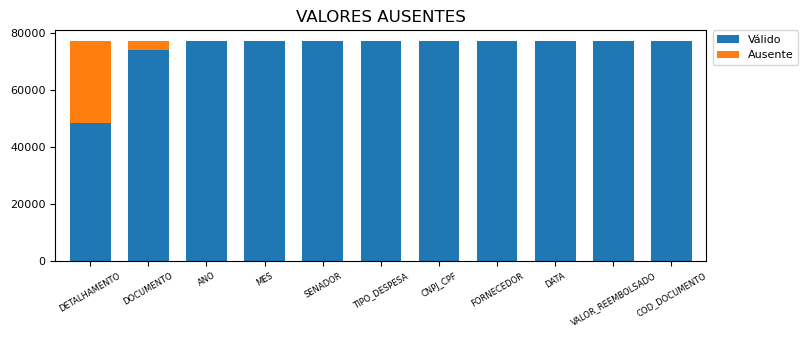

In [138]:
# Agrupa as quantidade de dados nulos e não nulos em um dataframe
ceaps_isnull = ceaps.isnull().sum()
ceaps_notnull = ceaps.notnull().sum()
ceaps_colunas = pd.DataFrame({'Válido':ceaps_notnull, 'Ausente':ceaps_isnull})

# Gráfico de barras
ax = ceaps_colunas.sort_values(by='Ausente',ascending =False).plot.bar(stacked=True, width=0.7, figsize = (12,3))

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.7, pos.height])
ax.legend(loc='right', prop={'size': 8}, bbox_to_anchor=(1.15, 0.925))

plt.xticks(fontsize=6, rotation=30)
plt.yticks(fontsize=8, rotation=0)
ax.set_title('VALORES AUSENTES')

**Verificando valores ausentes como tabela**

In [139]:
# Verificando visualmente os valores ausentes do campo DETALHAMENTO
ceaps[ceaps['DOCUMENTO'].isnull()].head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
303,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",002.756.358-80,JOSÉ ROBERTO MARQUES,NaN,30/01/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,3500,2086180
304,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",011.763.248-10,JOSUÉ DIMAS DE MELO PIMENTA,NaN,01/02/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,6766,2087011
306,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",46.392.130/0005-41,PREFEITURA DE SÃO PAULO,NaN,02/02/2018,IPTU DAS INSTALAÇÕES DO ESCRITÓRIO EM SÃO PAUL...,"787,69",2086996
333,2018,2,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",002.756.358-80,JOSÉ ROBERTO MARQUES,NaN,28/02/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,3500,2089926


In [140]:
# Verificando visualmente os valores ausentes do campo DETALHAMENTO
ceaps[ceaps['DETALHAMENTO'].isnull()].head()
#ceaps[['TIPO_DESPESA', 'FORNECEDOR', 'DETALHAMENTO']][ceaps['DETALHAMENTO'].isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,s/n,03/04/2018,NaN,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00369388,17/10/2018,NaN,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00370358,29/10/2018,NaN,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00372106,26/11/2018,NaN,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00372806,28/11/2018,NaN,"1102,1",2110411


# MANIPULAÇÃO DOS DADOS

**Preenchendo valores ausentes**

In [141]:
ceaps['DETALHAMENTO'] = (
    ceaps['DETALHAMENTO'].fillna('N/D') # N/D = Não disponível
    .reset_index(drop=True)
)
ceaps = ceaps.drop(columns=['DOCUMENTO']) 

# ceaps['DOCUMENTO'] = (    
#     ceaps['DOCUMENTO'].fillna('S/N') #S/N = Sem número
#     .reset_index(drop=True)
#   )

In [142]:
# Verifica se os valores ausente foram preenchidos
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].head(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,03/04/2018,N/D,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,17/10/2018,N/D,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,29/10/2018,N/D,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,26/11/2018,N/D,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,28/11/2018,N/D,"1102,1",2110411


In [143]:
# Verifica se os valores ausente de DETALHAMENTO foram preenchidos
ceaps[['TIPO_DESPESA', 'FORNECEDOR', 'DETALHAMENTO']][ceaps['DETALHAMENTO'].isna()]

,TIPO_DESPESA,FORNECEDOR,DETALHAMENTO


In [144]:
# Visualiza se os valores ausentes de DETALHAMENTO estão preenchidos com N/D
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,03/04/2018,N/D,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,17/10/2018,N/D,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,29/10/2018,N/D,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,26/11/2018,N/D,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,28/11/2018,N/D,"1102,1",2110411


In [145]:
# Visualiza se os valores ausentes de DOCUMENTO estão preenchidos com S/D
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('S/N', na=False)].head()

**Formatando os dados**

In [146]:
# Verifica os fornecedores com a palavra S/A

ceaps.loc[ceaps['FORNECEDOR'].str.contains('S/A', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
121,2018,1,AÉCIO NEVES,Aquisição de material de consumo para uso no e...,19.207.588/0003-49,EDIMINAS S/A EDITORA GRAFICA INDUSTRIAL DE MIN...,29/08/2017,Assinatura de jornal.,"49,9",2086304
301,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",71.208.516/0119-66,ALGAR TELECOM S/A,03/01/2017,"DESPESA COM ADESÃO TV BANDA LARGA, TELEFONIA F...","252,61",2086179
308,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,VIVO TELEFÔNICA BRASIL S/A,18/01/2018,DESPESA COM TELEFONIA FIXA NAS INSTALAÇÕES DO ...,"21,21",2086990
311,2018,1,AIRTON SANDOVAL,Aquisição de material de consumo para uso no e...,33.014.556/0209-79,LOJAS AMERICANAS S/A,30/01/2018,DESPESA COM MATERIAL DE CONSUMO PARA USO NO ES...,"224,88",2086516
369,2018,3,AIRTON SANDOVAL,"Locomoção, hospedagem, alimentação, combustíve...",16.670.085/0571-81,LOCALIZA RENT A CAR S/A,27/03/2018,DESPESA COM LOCAÇÃO DE MEIOS DE TRANSPORTE.,"127,84",2092729
...,...,...,...,...,...,...,...,...,...,...
11593,2021,9,NILDA GONDIM,"Locomoção, hospedagem, alimentação, combustíve...",17.261.661/0047-56,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,03/09/2021,DESPESA COM COMBUSTÍVEL EM VEÍCULOS UTILIZADOS...,"143,6",2166463
12381,2021,6,PAULO ROCHA,"Locomoção, hospedagem, alimentação, combustíve...",04.895.751/0002-55,Y- YAMADA S/A COM.IND.,15/06/2021,Senador José Serra - Aquisição de combustível ...,"24,98",2162855
12823,2021,8,RANDOLFE RODRIGUES,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,Gol Linhas Aereas S/A,11/08/2021,Refeição.,"1900,37",2171516
14319,2021,10,SÉRGIO PETECÃO,"Locomoção, hospedagem, alimentação, combustíve...",05.298.154/0001-25,Windsor Barra Hotel S/A,25/10/2021,Despesa com imóvel político: pagamento de aluguel,"1524,11",2169819


In [147]:
ceaps.iloc[[40]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
40,2018,4,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",33.453.598/0217-16,RAIZEN COMBUSTÍVEIS S.A.,23/04/2018,despesa com aquisição de combustível para abas...,"2837,08",2094589


In [148]:
ceaps.FORNECEDOR.head()

0               GILBERTO PISELO DO NASCIMENTO
1    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
2    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
3    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
4               GILBERTO PISELO DO NASCIMENTO
Name: FORNECEDOR, dtype: object

In [149]:
# Formata os dados
ceaps['SENADOR'] = ceaps['SENADOR'].str.title() #Senador com primeira letra maiúsculo
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].str.title() #Fornecedor com primeira letra maiúsculo
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace('Ltda','LTDA.', regex=True)
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace(r'LTDA\..', 'LTDA.', regex=True)
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace(' S A',' S.A.', regex=True)
ceaps.head(3)

#ceaps['DOCUMENTO'] = ceaps['DOCUMENTO'].replace('(?i)s\/n(.*)','S/N', regex=True) #Transforma s/n em S/N. (?i) ignora case-sensitive, s\/n busca por s/n, (.*) com qualquer caractere depois.

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,Acir Gurgacz,"Aluguel de imóveis para escritório político, c...",004.948.028-63,Gilberto Piselo Do Nascimento,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
1,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
2,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528


In [150]:
# Verifica se DETALHAMENTO contém 'n/d' em maíusculo
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].drop_duplicates(subset=['DETALHAMENTO'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,Aécio Neves,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,Sintaxi-Df,03/04/2018,N/D,35,2093667


In [151]:
# Verifica se DOCUMENTO contém 'n/d' em maiúsculo
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('S/N', na=False)].drop_duplicates(subset=['DOCUMENTO'])

In [152]:
# Verifica se DOCUMENTO contém 's/n' em minúsculo
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('s/n', na=False)].drop_duplicates(subset=['DOCUMENTO'])

In [153]:
# Verifica se FORNECEDER contém 'LTDA'
ceaps.loc[ceaps['FORNECEDOR'].str.contains('LTDA', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
15,2018,3,Acir Gurgacz,"Contratação de consultorias, assessorias, pesq...",09.562.725/0001-48,"Marca - Texto, Produção & Arte LTDA.- Epp",05/03/2018,Prestação de serviço para transmissão de Audiê...,2200,2090397
118,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",02.059.753/0001-06,Emive Patrulha 24 Horas LTDA.,03/01/2018,Vigilância patrimonial referente a janeiro de ...,"252,91",2087337
120,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,14.298.003/0001-68,Diario Do Rio Doce LTDA.- Epp,30/08/2017,Assinatura de jornal.,6,2086302
122,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,00.896.242/0001-05,Fibra Telecomunicações LTDA.,02/01/2018,Locação de equipamento telefônico.,"413,33",2088322
...,...,...,...,...,...,...,...,...,...,...
16751,2021,10,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",38.146.544/0002-10,Naval LTDA.,14/10/2021,N/D,80,2169624
16760,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",01.174.530/0001-19,Auto Posto Rui Barbosa LTDA.,12/11/2021,N/D,"150,04",2170337
16768,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",18.594.995/0001-21,Lc Silva LTDA.,05/11/2021,"Companhia Aérea: AZUL, Localizador: B9RNJC. Pa...",108,2169518
16771,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",05.843.222/0001-90,Posto Barreirinhas LTDA.,05/11/2021,"Companhia Aérea: GOL, Localizador: ZDFKHB. Pas...",370,2169517


In [154]:
# Verifica se FORNECEDER contém 'S.A.'
ceaps.loc[ceaps['FORNECEDOR'].str.contains('S.A.', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
14,2018,3,Acir Gurgacz,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,Oi Móvel S.A.,06/03/2018,Despesa com pagamento de telefonia para o escr...,"649,52",2091316
18,2018,3,Acir Gurgacz,"Locomoção, hospedagem, alimentação, combustíve...",33.453.598/0066-79,Raizen Combustíveis S.A.,16/03/2018,Despesa com aquisição de combustível para abas...,"2993,51",2092250
114,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",18.007.971/0001-29,Asamar S.A.,02/02/2018,Referente ao aluguel - janeiro/2018.,7000,2087336
115,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",40.432.544/0112-62,Claro S.A.,06/01/2018,"TV por assinatura, telefone e internet.","422,97",2088318
121,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,19.207.588/0003-49,Ediminas S/A Editora Grafica Industrial De Min...,29/08/2017,Assinatura de jornal.,"49,9",2086304
...,...,...,...,...,...,...,...,...,...,...
8566,2021,4,José Serra,Aquisição de material de consumo para uso no e...,43.283.811/0061-90,Kalunga S.A.,07/04/2021,Despesa com energia elétrica para o escritório...,"62,7",2158140
9708,2021,11,Luis Carlos Heinze,"Locomoção, hospedagem, alimentação, combustíve...",87.392.320/0001-12,Curi S.A. Hoteis E Turismo - Curi Palace Hotel,13/11/2021,Despesa com serviço de táxi para o Senador.,220,2169911
12381,2021,6,Paulo Rocha,"Locomoção, hospedagem, alimentação, combustíve...",04.895.751/0002-55,Y- Yamada S/A Com.Ind.,15/06/2021,Senador José Serra - Aquisição de combustível ...,"24,98",2162855
15530,2021,7,Virginio De Carvalho,"Locomoção, hospedagem, alimentação, combustíve...",09.967.852/0061-68,Hotelaria Accor Brasil. S.A.,30/07/2021,"Companhia Aérea: AVIANCA, Localizador: JLXVS8....","2584,6",2168012


In [155]:
# Verifica se ainda resta valores ausentes
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

In [156]:
# Verifica quais TIPO_DESPESA existem
ceaps[['TIPO_DESPESA']].drop_duplicates()

,TIPO_DESPESA
0,"Aluguel de imóveis para escritório político, c..."
1,"Passagens aéreas, aquáticas e terrestres nacio..."
5,Divulgação da atividade parlamentar
15,"Contratação de consultorias, assessorias, pesq..."
18,"Locomoção, hospedagem, alimentação, combustíve..."
120,Aquisição de material de consumo para uso no e...
4226,Serviços de Segurança Privada


In [157]:
# Renomeia o TIPO_DESPESA para ficar consistente ao canal de transparência dos senadores individuais
# Exemplo: https://www6g.senado.leg.br/transparencia/sen/5985/?ano=2022

ceaps['TIPO_DESPESA'] = ceaps['TIPO_DESPESA'].replace({'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.':'Aluguel de imóveis para escritório político',
       'Divulgação da atividade parlamentar': 'Divulgação da atividade parlamentar',
       'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens aéreas, aquáticas e terrestres nacionais',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem, alimentação e combustíveis',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratação de serviços de apoio ao parlamentar ',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Aquisição de material de consumo ',
       'Serviços de Segurança Privada': 'Serviços de Segurança Privada '})

In [158]:
ceaps[['TIPO_DESPESA']].drop_duplicates()

,TIPO_DESPESA
0,Aluguel de imóveis para escritório político
1,"Passagens aéreas, aquáticas e terrestres nacio..."
5,Divulgação da atividade parlamentar
15,Contratação de serviços de apoio ao parlamentar
18,"Locomoção, hospedagem, alimentação e combustíveis"
120,Aquisição de material de consumo
4226,Serviços de Segurança Privada


**Convertendo os dados**

In [159]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                77043 non-null  int64 
 1   MES                77043 non-null  int64 
 2   SENADOR            77043 non-null  object
 3   TIPO_DESPESA       77043 non-null  object
 4   CNPJ_CPF           77043 non-null  object
 5   FORNECEDOR         77043 non-null  object
 6   DATA               77043 non-null  object
 7   DETALHAMENTO       77043 non-null  object
 8   VALOR_REEMBOLSADO  77043 non-null  object
 9   COD_DOCUMENTO      77043 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 6.5+ MB


In [160]:
# Converte o VALOR_REEMBOLSADO para float
ceaps['VALOR_REEMBOLSADO'] = ceaps['VALOR_REEMBOLSADO'].str.replace(',', '.')
ceaps['VALOR_REEMBOLSADO'] = ceaps['VALOR_REEMBOLSADO'].apply(float)

# Para visualização dos valores de forma mais humana
# ceaps['VALOR_REEMBOLSADO'] = ceaps['VALOR_REEMBOLSADO'].map('{:,.2f}'.format).str.replace(',', '~').str.replace('.', ',').str.replace('~', '.')

ceaps.iloc[[40]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
40,2018,4,Acir Gurgacz,"Locomoção, hospedagem, alimentação e combustíveis",33.453.598/0217-16,Raizen Combustíveis S.A.,23/04/2018,despesa com aquisição de combustível para abas...,2837.08,2094589


<AxesSubplot: >

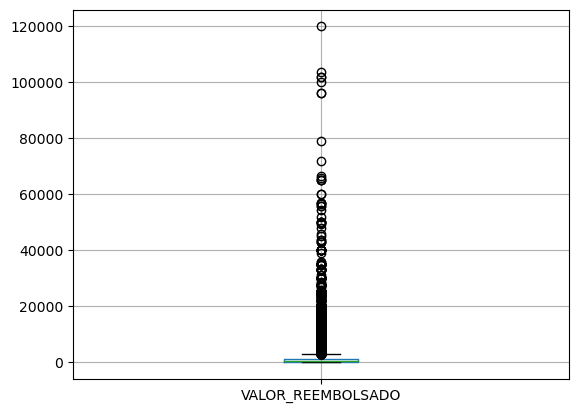

In [161]:
ceaps[['VALOR_REEMBOLSADO']].boxplot()

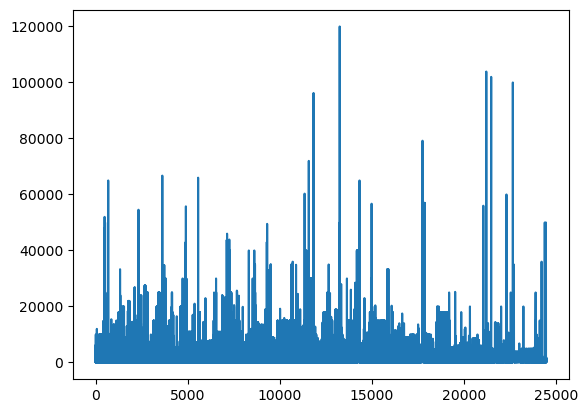

In [162]:
plt.plot(ceaps.VALOR_REEMBOLSADO)

In [163]:
ceaps[['SENADOR', 'VALOR_REEMBOLSADO', 'TIPO_DESPESA', 'DETALHAMENTO']].drop_duplicates(subset='VALOR_REEMBOLSADO').sort_values('VALOR_REEMBOLSADO').head(20)

,SENADOR,VALOR_REEMBOLSADO,TIPO_DESPESA,DETALHAMENTO
3868,Dário Berger,0.01,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: K5RKJV...."
15208,Vanderlan Cardoso,0.02,Aluguel de imóveis para escritório político,COMBUSTÍVEL
12870,Lasier Martins,0.03,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: GOL, Localizador: GJR89G. Pas..."
11044,Luis Carlos Heinze,0.04,"Passagens aéreas, aquáticas e terrestres nacio...",N/D
1502,Carlos Viana,0.06,"Locomoção, hospedagem, alimentação e combustíveis",N/D
12709,Vanderlan Cardoso,0.12,"Locomoção, hospedagem, alimentação e combustíveis",DESPESAS COM HOSPEDAGEM PARA A SENADORA KÁTIA ...
9153,Maria Do Carmo Alves,0.16,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: GOL, Localizador: NKTUHW. Pas..."
8321,Jean Paul Prates,0.17,"Locomoção, hospedagem, alimentação e combustíveis",Despesa Postal
1713,Antônio Carlos Valadares,0.18,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: W5LR6K...."
18402,Renan Calheiros,0.20,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: TLQ7Q5...."


In [164]:
ceaps[ceaps.VALOR_REEMBOLSADO < 10].sort_values(by='VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2534,2020,3,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,Gol Linhas Aéreas Inteligentes,23/03/2020,VALOR PAGO REFERENTE AO USO DE COMBUSTÍVEL EM ...,0.01,2143009
2630,2020,10,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,Latam,20/10/2020,"Companhia Aérea: GOL, Localizador: TI6MHP. Pas...",0.01,2152900
2550,2020,3,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,Latam,25/03/2020,VALOR PAGO REFERENTE AO ALUGUEL DAS SALAS ONDE...,0.01,2142997
1485,2021,9,Carlos Portinho,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,27/09/2021,"Companhia Aérea: GOL, Localizador: JED7JY. Pas...",0.01,2167020
1529,2021,11,Carlos Portinho,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,09/11/2021,N/D,0.01,2169931
...,...,...,...,...,...,...,...,...,...,...
819,2018,4,Ana Amélia,Aquisição de material de consumo,05.563.868/0003-85,Beller Comércio De Papeis LTDA.,26/04/2018,Despesa com material de consumo para o Escritó...,9.98,2095957
731,2018,2,Ana Amélia,Aquisição de material de consumo,93.015.006/0007-09,Companhia Zaffari Comércio E Indústria,19/02/2018,Despesa com material de consumo para o Escritó...,9.98,2090796
19931,2018,5,Romário,Aluguel de imóveis para escritório político,05.196.080/0001-16,Calleri Assessoria E Consultoria Imobiliária L...,31/05/2018,N/D,9.99,2097692
20142,2019,9,Wellington Fagundes,"Locomoção, hospedagem, alimentação e combustíveis",18.033.552/0001-61,99 Taxis LTDA.-Epp,11/09/2019,Referente a licença de conteúdo jornalístico.,9.99,2131735


In [165]:
# Quantos valores abaixo de 10 reais existem
ceaps[ceaps.VALOR_REEMBOLSADO < 10].shape[0]

385

In [166]:
# Quantos valores acima de 40 mil reais existem
ceaps[ceaps.VALOR_REEMBOLSADO > 40000].shape[0]

38

In [167]:
ceaps['VALOR_REEMBOLSADO'].describe()

count     77043.000000
mean       1249.798050
std        2919.967308
min           0.010000
25%         141.890000
50%         365.040000
75%        1355.615000
max      120000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

In [168]:
# Verifica se o VALOR_REEMBOLSADO foi convertido para float
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                77043 non-null  int64  
 1   MES                77043 non-null  int64  
 2   SENADOR            77043 non-null  object 
 3   TIPO_DESPESA       77043 non-null  object 
 4   CNPJ_CPF           77043 non-null  object 
 5   FORNECEDOR         77043 non-null  object 
 6   DATA               77043 non-null  object 
 7   DETALHAMENTO       77043 non-null  object 
 8   VALOR_REEMBOLSADO  77043 non-null  float64
 9   COD_DOCUMENTO      77043 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 6.5+ MB


**Convertendo o valor data**

In [169]:
# Separa o mês e ano e substitui o DATA_TEMP
ceaps['DATA_TEMP'] = ceaps['DATA']

# Converte para datetime (ano-mês-dia) e transforma os valores incorretos em NaT
# ceaps['DATA'] = pd.to_datetime(ceaps['DATA'], format='%Y-%m-%d', errors = 'coerce')
ceaps['DATA'] = pd.to_datetime(ceaps['DATA'], dayfirst=True, errors = 'coerce')

In [170]:
# Verifica se ainda tem dados não convertidos para datetime
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 5
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
DATA_TEMP            0
dtype: int64

In [171]:
# Organiza a data em ordem ascendente
ceaps['DATA'].sort_values()

6863    1957-12-19
10470   2001-05-03
208     2002-02-19
12347   2002-03-14
7031    2002-04-05
           ...    
13941          NaT
16559          NaT
10986          NaT
10362          NaT
2148           NaT
Name: DATA, Length: 77043, dtype: datetime64[ns]

In [172]:
# Seleciona as datas não convertidas juntamente com a data antes da conversão para comparação
ceaps[['ANO', 'MES', 'DATA', 'DATA_TEMP']][ceaps['DATA'].isna()]

,ANO,MES,DATA,DATA_TEMP
13941,2018,3,NaT,09/05/0208
16559,2018,11,NaT,16/11/1201
10986,2019,1,NaT,31/01/0219
10362,2020,5,NaT,05/05/0202
2148,2021,11,NaT,29/10/0202


In [173]:
# Filtra todas as datas menores que 2017
ceaps[pd.to_datetime(ceaps['DATA'].astype(str)).dt.year <= 2016].drop_duplicates()
# Notei que o campo ANO e MES possui inconsistências com o campo DATA
# Decidi aplicar o mesmo método de separar o dia, mês, ano e aplicar no campo DATA ao invés de fillna

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_TEMP
163,2018,4,Aécio Neves,Aluguel de imóveis para escritório político,02.059.753/0001-06,Emive Patrulha 24 Horas LTDA.,2010-04-02,Vigilância patrimonial referente a abril de 2018.,252.91,2095178,02/04/2010
1679,2018,5,Antônio Carlos Valadares,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens E Turismo LTDA.,2014-05-27,"Companhia Aérea: AVIANCA, Localizador: L5F3WB....",433.17,2098747,27/05/2014
6863,2018,12,Fernando Bezerra Coelho,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,1957-12-19,"Companhia Aérea: AZUL, Localizador: OG9CQD. Pa...",471.29,2112441,19/12/1957
7031,2018,5,Flexa Ribeiro,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,Latam,2002-04-05,"Companhia Aérea: LATAM, Localizador: OECRNE. P...",613.48,2099086,05/04/2002
10470,2018,4,José Agripino,Aquisição de material de consumo,13.165.472/0001-46,Ff Distribuidora,2001-05-03,N/D,500.00,2098308,03/05/2001
4846,2019,10,Esperidião Amin,"Passagens aéreas, aquáticas e terrestres nacio...",00.556.066/0001-62,Fibratur Turismo E Viagens LTDA.,2010-09-12,N/D,633.72,2132200,12/09/2010
8250,2019,8,Jayme Campos,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens E Turismo LTDA.,2009-08-02,Despesa de combustível,1697.34,2128956,02/08/2009
14373,2019,12,Oriovisto Guimarães,Aluguel de imóveis para escritório político,02.804.267/0001-67,Ch Franco Administracao De Bens LTDA.,2016-01-06,"Companhia Aérea: LATAM, Localizador: REULEY. P...",3800.00,2141992,06/01/2016
15171,2019,1,Paulo Rocha,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens E Turismo LTDA.,2014-01-08,COMBUSTÍVEL,864.16,2114683,08/01/2014
20953,2019,9,Zenaide Maia,Divulgação da atividade parlamentar,08.250.946/0001-18,Rádio Difusora De Mossoró S/A,2010-10-07,N/D,2000.00,2132485,07/10/2010


In [174]:
#ceaps['DIA'] = ceaps.DATA.str.slice(-2)
#ceaps['MES'] = ceaps.DATA.str.slice(5, 7)
#ceaps['MES'] = ceaps['MES'].astype('str').apply(lambda x: '0'+x if len(x)==1 else  x)

ceaps['DATA'] = ceaps['DATA'].astype('str') #transforma a data em string
ceaps['DIA_MES_ANO'] = ceaps['ANO'].astype('str') + '-' + ceaps.DATA.str.slice(5, 7) + '-' + ceaps.DATA.str.slice(-2) #une o ano+mês+dia
ceaps['DATA'] = ceaps['DIA_MES_ANO'] #substitui a DATA pelos valores corretos

ceaps['DATA'] = pd.to_datetime(ceaps['DATA']) #converte a data para datetime
ceaps = ceaps.drop(columns=['DIA_MES_ANO', 'DATA_TEMP']) #dropa as colunas temporárias

In [175]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77043 non-null  int64         
 1   MES                77043 non-null  int64         
 2   SENADOR            77043 non-null  object        
 3   TIPO_DESPESA       77043 non-null  object        
 4   CNPJ_CPF           77043 non-null  object        
 5   FORNECEDOR         77043 non-null  object        
 6   DATA               77043 non-null  datetime64[ns]
 7   DETALHAMENTO       77043 non-null  object        
 8   VALOR_REEMBOLSADO  77043 non-null  float64       
 9   COD_DOCUMENTO      77043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.5+ MB


In [176]:
# Verifica se ainda existe valores ausentes
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

**Convertendo os dados**

In [177]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77043 non-null  int64         
 1   MES                77043 non-null  int64         
 2   SENADOR            77043 non-null  object        
 3   TIPO_DESPESA       77043 non-null  object        
 4   CNPJ_CPF           77043 non-null  object        
 5   FORNECEDOR         77043 non-null  object        
 6   DATA               77043 non-null  datetime64[ns]
 7   DETALHAMENTO       77043 non-null  object        
 8   VALOR_REEMBOLSADO  77043 non-null  float64       
 9   COD_DOCUMENTO      77043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.5+ MB


<AxesSubplot: >

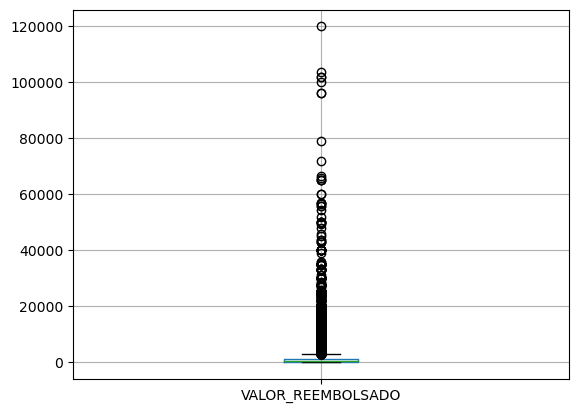

In [178]:
ceaps[['VALOR_REEMBOLSADO']].boxplot()

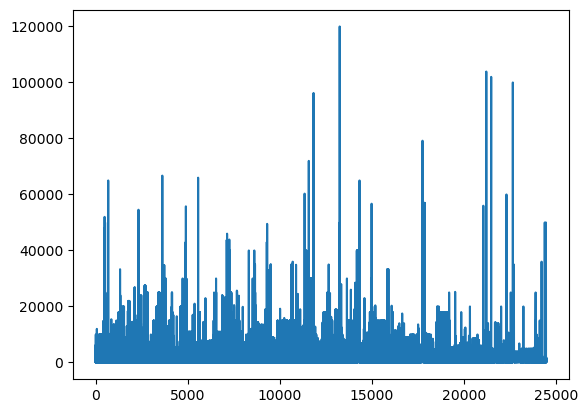

In [179]:
plt.plot(ceaps.VALOR_REEMBOLSADO)

In [180]:
ceaps[['SENADOR', 'VALOR_REEMBOLSADO', 'TIPO_DESPESA', 'DETALHAMENTO']].drop_duplicates(subset='VALOR_REEMBOLSADO').sort_values('VALOR_REEMBOLSADO').head(20)

,SENADOR,VALOR_REEMBOLSADO,TIPO_DESPESA,DETALHAMENTO
3868,Dário Berger,0.01,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: K5RKJV...."
15208,Vanderlan Cardoso,0.02,Aluguel de imóveis para escritório político,COMBUSTÍVEL
12870,Lasier Martins,0.03,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: GOL, Localizador: GJR89G. Pas..."
11044,Luis Carlos Heinze,0.04,"Passagens aéreas, aquáticas e terrestres nacio...",N/D
1502,Carlos Viana,0.06,"Locomoção, hospedagem, alimentação e combustíveis",N/D
12709,Vanderlan Cardoso,0.12,"Locomoção, hospedagem, alimentação e combustíveis",DESPESAS COM HOSPEDAGEM PARA A SENADORA KÁTIA ...
9153,Maria Do Carmo Alves,0.16,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: GOL, Localizador: NKTUHW. Pas..."
8321,Jean Paul Prates,0.17,"Locomoção, hospedagem, alimentação e combustíveis",Despesa Postal
1713,Antônio Carlos Valadares,0.18,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: W5LR6K...."
18402,Renan Calheiros,0.20,"Passagens aéreas, aquáticas e terrestres nacio...","Companhia Aérea: AVIANCA, Localizador: TLQ7Q5...."


In [181]:
ceaps[ceaps.VALOR_REEMBOLSADO < 10].sort_values(by='VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2534,2020,3,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,Gol Linhas Aéreas Inteligentes,2020-03-23,VALOR PAGO REFERENTE AO USO DE COMBUSTÍVEL EM ...,0.01,2143009
2630,2020,10,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,Latam,2020-10-20,"Companhia Aérea: GOL, Localizador: TI6MHP. Pas...",0.01,2152900
2550,2020,3,Dário Berger,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,Latam,2020-03-25,VALOR PAGO REFERENTE AO ALUGUEL DAS SALAS ONDE...,0.01,2142997
1485,2021,9,Carlos Portinho,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,2021-09-27,"Companhia Aérea: GOL, Localizador: JED7JY. Pas...",0.01,2167020
1529,2021,11,Carlos Portinho,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,2021-11-09,N/D,0.01,2169931
...,...,...,...,...,...,...,...,...,...,...
819,2018,4,Ana Amélia,Aquisição de material de consumo,05.563.868/0003-85,Beller Comércio De Papeis LTDA.,2018-04-26,Despesa com material de consumo para o Escritó...,9.98,2095957
731,2018,2,Ana Amélia,Aquisição de material de consumo,93.015.006/0007-09,Companhia Zaffari Comércio E Indústria,2018-02-19,Despesa com material de consumo para o Escritó...,9.98,2090796
19931,2018,5,Romário,Aluguel de imóveis para escritório político,05.196.080/0001-16,Calleri Assessoria E Consultoria Imobiliária L...,2018-05-31,N/D,9.99,2097692
20142,2019,9,Wellington Fagundes,"Locomoção, hospedagem, alimentação e combustíveis",18.033.552/0001-61,99 Taxis LTDA.-Epp,2019-09-11,Referente a licença de conteúdo jornalístico.,9.99,2131735


In [182]:
# Quantos valores abaixo de 10 reais existem
ceaps[ceaps.VALOR_REEMBOLSADO < 10].shape[0]

385

In [183]:
# Quantos valores acima de 40 mil reais existem
ceaps[ceaps.VALOR_REEMBOLSADO > 40000].shape[0]

38

In [184]:
ceaps['VALOR_REEMBOLSADO'].describe()

count     77043.000000
mean       1249.798050
std        2919.967308
min           0.010000
25%         141.890000
50%         365.040000
75%        1355.615000
max      120000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

In [185]:
# Verifica se o VALOR_REEMBOLSADO foi convertido para float
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77043 non-null  int64         
 1   MES                77043 non-null  int64         
 2   SENADOR            77043 non-null  object        
 3   TIPO_DESPESA       77043 non-null  object        
 4   CNPJ_CPF           77043 non-null  object        
 5   FORNECEDOR         77043 non-null  object        
 6   DATA               77043 non-null  datetime64[ns]
 7   DETALHAMENTO       77043 non-null  object        
 8   VALOR_REEMBOLSADO  77043 non-null  float64       
 9   COD_DOCUMENTO      77043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.5+ MB


**Convertendo o valor data**

In [186]:
# Separa o mês e ano e substitui o DATA_TEMP
ceaps['DATA_TEMP'] = ceaps['DATA']

# Converte para datetime (ano-mês-dia) e transforma os valores incorretos em NaT
# ceaps['DATA'] = pd.to_datetime(ceaps['DATA'], format='%Y-%m-%d', errors = 'coerce')
ceaps['DATA'] = pd.to_datetime(ceaps['DATA'], dayfirst=True, errors = 'coerce')

In [187]:
# Verifica se ainda tem dados não convertidos para datetime
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
DATA_TEMP            0
dtype: int64

In [188]:
# Organiza a data em ordem ascendente
ceaps['DATA'].sort_values()

1766    2018-01-01
1764    2018-01-01
15140   2018-01-01
13941   2018-01-01
10081   2018-01-01
           ...    
11088   2021-12-31
14253   2021-12-31
14585   2021-12-31
16815   2021-12-31
11183   2021-12-31
Name: DATA, Length: 77043, dtype: datetime64[ns]

In [189]:
# Seleciona as datas não convertidas juntamente com a data antes da conversão para comparação
ceaps[['ANO', 'MES', 'DATA', 'DATA_TEMP']][ceaps['DATA'].isna()]

,ANO,MES,DATA,DATA_TEMP


In [190]:
# Filtra todas as datas menores que 2017
ceaps[pd.to_datetime(ceaps['DATA'].astype(str)).dt.year <= 2016].drop_duplicates()
# Notei que o campo ANO e MES possui inconsistências com o campo DATA
# Decidi aplicar o mesmo método de separar o dia, mês, ano e aplicar no campo DATA ao invés de fillna

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_TEMP


In [191]:
# ceaps['DIA'] = ceaps.DATA.str.slice(-2)
# ceaps['MES'] = ceaps.DATA.str.slice(5, 7)
# ceaps['MES'] = ceaps['MES'].astype('str').apply(lambda x: '0'+x if len(x)==1 else  x)

ceaps['DATA'] = ceaps['DATA'].astype('str') # transforma a data em string
ceaps['DIA_MES_ANO'] = ceaps['ANO'].astype('str') + '-' + ceaps.DATA.str.slice(5, 7) + '-' + ceaps.DATA.str.slice(-2) # une o ano+mês+dia
ceaps['DATA'] = ceaps['DIA_MES_ANO'] # substitui a DATA pelos valores corretos

ceaps['DATA'] = pd.to_datetime(ceaps['DATA']) # converte a data para datetime
ceaps = ceaps.drop(columns=['DIA_MES_ANO', 'DATA_TEMP']) # dropa as colunas temporárias

In [192]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77043 non-null  int64         
 1   MES                77043 non-null  int64         
 2   SENADOR            77043 non-null  object        
 3   TIPO_DESPESA       77043 non-null  object        
 4   CNPJ_CPF           77043 non-null  object        
 5   FORNECEDOR         77043 non-null  object        
 6   DATA               77043 non-null  datetime64[ns]
 7   DETALHAMENTO       77043 non-null  object        
 8   VALOR_REEMBOLSADO  77043 non-null  float64       
 9   COD_DOCUMENTO      77043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.5+ MB


In [193]:
# Verifica se ainda existe valores ausentes
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

In [194]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                77043 non-null  int64         
 1   MES                77043 non-null  int64         
 2   SENADOR            77043 non-null  object        
 3   TIPO_DESPESA       77043 non-null  object        
 4   CNPJ_CPF           77043 non-null  object        
 5   FORNECEDOR         77043 non-null  object        
 6   DATA               77043 non-null  datetime64[ns]
 7   DETALHAMENTO       77043 non-null  object        
 8   VALOR_REEMBOLSADO  77043 non-null  float64       
 9   COD_DOCUMENTO      77043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 6.5+ MB


**Inserindo campos adicionais**

In [195]:
# Notei um comportamente estranho ao preencher os valores ausentes dos campos UF e PARTIDO, alguns senadores foram preenchidos incorretamente
# Exportei e importei o dataset novamente sem utilizar o encoding 'cp1252', e o problema anterior foi resolvido
ceaps.to_csv('data/despesa_ceaps_final.csv', sep =';', index=False)
ceaps = pd.read_csv('data/despesa_ceaps_final.csv', sep=';')

In [196]:
# Encontrei três páginas da web com senadores e juntei os dois primeiros na mesma planilha, o ultimo é da 55ª legislatura (2018)
# https://www25.senado.leg.br/web/senadores
# https://www25.senado.leg.br/web/senadores/fora-de-exercicio/-/f/por-nome
# https://www25.senado.leg.br/web/senadores/legislaturas-anteriores/-/a/55
senadores56 = pd.read_csv('data/lista_senadores_56leg.csv', sep=';') # dataset com o UF e ESTADO dos senadores da 56ª Legislação
senadores55 = pd.read_csv('data/lista_senadores_55leg.csv', sep=';') # dataset com o UF e ESTADO dos senadores da 55ª Legislação
geografia = pd.read_csv('data/dados_geograficos.csv', sep=';')

In [197]:
# Cria os campos novos com valores ausentes
ceaps['PARTIDO'] = np.nan
ceaps['UF'] = np.nan
ceaps['ESTADO'] = np.nan
ceaps['REGIAO'] = np.nan

In [198]:
# Renomeia os nomes dos senadores com a primeira letra de cada palavra para maiúsculo
senadores56['NOME_PARLAMENTAR'] = senadores56['NOME_PARLAMENTAR'].str.upper()
senadores55['NOME_PARLAMENTAR'] = senadores55['NOME_PARLAMENTAR'].str.upper()
ceaps['SENADOR'] = ceaps['SENADOR'].str.upper()

In [199]:
ceaps[['PARTIDO', 'UF', 'ESTADO', 'REGIAO']]

,PARTIDO,UF,ESTADO,REGIAO
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
77038,NaN,NaN,NaN,NaN
77039,NaN,NaN,NaN,NaN
77040,NaN,NaN,NaN,NaN
77041,NaN,NaN,NaN,NaN


In [200]:
senadores56.head()

,NOME_PARLAMENTAR,PARTIDO,UF
0,ACIR GURGACZ,PDT,RO
1,ALESSANDRO VIEIRA,PSDB,SE
2,ALEXANDRE SILVEIRA,PSD,MG
3,ALVARO DIAS,PODEMOS,PR
4,ANGELO CORONEL,PSD,BA


In [201]:
senadores55.head()

,NOME_PARLAMENTAR,PARTIDO,UF
0,ACIR GURGACZ,PDT,RO
1,AÉCIO NEVES,PSDB,MG
2,AIRTON SANDOVAL,MDB,SP
3,ALOYSIO NUNES FERREIRA,PSDB,SP
4,ALVARO DIAS,PODEMOS,PR


In [202]:
geografia.head()

,Cod UF,UF,Sgl UF,Cod IBGE,Nome Município,Latitude,Longitude,Sgl Região,Região,Chave_Localidade,Nome Municipio Tratado
0,29,Bahia,BA,2900108,ABAÍRA,"-13,2507","-41,6647",NE,Nordeste,BA_ABAIRA,ABAIRA
1,29,Bahia,BA,2900207,ABARÉ,"-8,72375","-39,1146",NE,Nordeste,BA_ABARE,ABARE
2,29,Bahia,BA,2900306,ACAJUTIBA,"-11,658","-38,0201",NE,Nordeste,BA_ACAJUTIBA,ACAJUTIBA
3,29,Bahia,BA,2900355,ADUSTINA,"-10,5357","-38,1158",NE,Nordeste,BA_ADUSTINA,ADUSTINA
4,29,Bahia,BA,2900405,ÁGUA FRIA,"-11,8623","-38,7642",NE,Nordeste,BA_AGUA FRIA,AGUA FRIA


In [203]:
# Substitui os campos faltantes pelos campos existentes da outra planilha, usando o nome do senador como índice
# 56ª Legislação
ceaps['PARTIDO'] = (
    ceaps.set_index(['SENADOR'], drop=False)['PARTIDO']
    .fillna(senadores56.set_index(['NOME_PARLAMENTAR'], drop=False)['PARTIDO'])
    .reset_index(drop=True)
)
ceaps['UF'] = (
    ceaps.set_index(['SENADOR'], drop=False)['UF']
    .fillna(senadores56.set_index(['NOME_PARLAMENTAR'], drop=False)['UF'])
    .reset_index(drop=True)
)

# 55ª Legislação
ceaps['PARTIDO'] = (
    ceaps.set_index(['SENADOR'], drop=False)['PARTIDO']
    .fillna(senadores55.set_index(['NOME_PARLAMENTAR'], drop=False)['PARTIDO'])
    .reset_index(drop=True)
)
ceaps['UF'] = (
    ceaps.set_index(['SENADOR'], drop=False)['UF']
    .fillna(senadores55.set_index(['NOME_PARLAMENTAR'], drop=False)['UF'])
    .reset_index(drop=True)
)

In [204]:
# Substitui os campos faltantes pelos campos existentes da outra planilha, usando a UF como índice
geografia = geografia.drop_duplicates(subset=['UF'])
ceaps['ESTADO'] = (
    ceaps.set_index(['UF'], drop=False)['ESTADO']
    .fillna(geografia.set_index(['Sgl UF'], drop=False)['UF'])
    .reset_index(drop=True)
)

In [205]:
# Substitui os campos faltantes pelos campos existentes da outra planilha, usando a REGIAO como índice
geografia = geografia.drop_duplicates(subset=['UF'])
ceaps['REGIAO'] = (
    ceaps.set_index(['UF'], drop=False)['REGIAO']
    .fillna(geografia.set_index(['Sgl UF'], drop=False)['Região'])
    .reset_index(drop=True)
)

In [206]:
# Verifica se ainda restam valores ausentes
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
PARTIDO              0
UF                   0
ESTADO               0
REGIAO               0
dtype: int64

In [207]:
# Verifica se ainda restam valores ausentes
ceaps[['SENADOR','UF','PARTIDO']][ceaps['UF'].isna()].drop_duplicates(subset=['SENADOR'])

,SENADOR,UF,PARTIDO


In [208]:
ceaps

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,PARTIDO,UF,ESTADO,REGIAO
0,2018,1,ACIR GURGACZ,Aluguel de imóveis para escritório político,004.948.028-63,Gilberto Piselo Do Nascimento,2018-01-02,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462,PDT,RO,Rondônia,Norte
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,2018-01-02,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476,PDT,RO,Rondônia,Norte
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,2018-01-02,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528,PDT,RO,Rondônia,Norte
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,2018-01-24,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475,PDT,RO,Rondônia,Norte
4,2018,2,ACIR GURGACZ,Aluguel de imóveis para escritório político,004.948.028-63,Gilberto Piselo Do Nascimento,2018-02-01,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477,PDT,RO,Rondônia,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77038,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,2021-12-01,N/D,1715.45,2170983,PL,PA,Pará,Norte
77039,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,2021-12-15,N/D,2489.29,2172263,PL,PA,Pará,Norte
77040,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,2021-12-17,N/D,1486.66,2172717,PL,PA,Pará,Norte
77041,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,2021-12-27,N/D,2515.56,2173239,PL,PA,Pará,Norte


In [209]:
# Renomeia os valores do campo SENADOR com a primeira letra de cada palavra para maiúsculo
ceaps['SENADOR'] = ceaps['SENADOR'].str.title()

# EXPORTANDO OS DADOS

In [210]:
# Renomeia as colunas antes da exportação
colunas = ['Ano', 'Mês', 'Senador', 'Tipo de Despesa', 'CNPJ/CPF', 'Fornecedor',
           'Data', 'Detalhamento', 'Valor Reembolsado', 'Código do Documento',
           'Partido', 'UF', 'Estado', 'Região']
ceaps.columns = colunas
print(ceaps.columns)

Index(['Ano', 'Mês', 'Senador', 'Tipo de Despesa', 'CNPJ/CPF', 'Fornecedor',
       'Data', 'Detalhamento', 'Valor Reembolsado', 'Código do Documento',
       'Partido', 'UF', 'Estado', 'Região'],
      dtype='object')


In [211]:
ceaps = ceaps.reset_index(drop=True)
ceaps['Data'] = pd.to_datetime(ceaps['Data']) # converte a data para datetime

In [212]:
ceaps.loc[[1, 174, 301], :]

,Ano,Mês,Senador,Tipo de Despesa,CNPJ/CPF,Fornecedor,Data,Detalhamento,Valor Reembolsado,Código do Documento,Partido,UF,Estado,Região
1,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,2018-01-02,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476,PDT,RO,Rondônia,Norte
174,2018,4,Aécio Neves,"Locomoção, hospedagem, alimentação e combustíveis",07.424.109/0001-03,Sintaxi-Df,2018-04-03,N/D,35.00,2093667,PSDB,MG,Minas Gerais,Sudeste
301,2018,1,Airton Sandoval,Aluguel de imóveis para escritório político,71.208.516/0119-66,Algar Telecom S/A,2018-01-03,"DESPESA COM ADESÃO TV BANDA LARGA, TELEFONIA F...",252.61,2086179,MDB,SP,São Paulo,Sudeste


In [213]:
ceaps.drop_duplicates(subset=["Senador"]).head(10)

,Ano,Mês,Senador,Tipo de Despesa,CNPJ/CPF,Fornecedor,Data,Detalhamento,Valor Reembolsado,Código do Documento,Partido,UF,Estado,Região
0,2018,1,Acir Gurgacz,Aluguel de imóveis para escritório político,004.948.028-63,Gilberto Piselo Do Nascimento,2018-01-02,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462,PDT,RO,Rondônia,Norte
114,2018,1,Aécio Neves,Aluguel de imóveis para escritório político,18.007.971/0001-29,Asamar S.A.,2018-02-02,Referente ao aluguel - janeiro/2018.,7000.00,2087336,PSDB,MG,Minas Gerais,Sudeste
300,2018,1,Airton Sandoval,Aluguel de imóveis para escritório político,61.695.227/0001-93,Aes Eletropaulo,2018-01-16,DESPESA COM ENERGIA ELÉTRICA NAS INSTALAÇÕES D...,147.93,2086986,MDB,SP,São Paulo,Sudeste
663,2018,1,Alvaro Dias,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens E Turismo,2018-01-04,"Companhia Aérea: GOL, Localizador: CM6LYA. Pas...",675.82,2086978,PODEMOS,PR,Paraná,Sul
703,2018,1,Ana Amélia,Aluguel de imóveis para escritório político,40.432.544/0101-00,Claro S.A,2018-01-17,Despesa com telefone fixo do Escritório Políti...,117.28,2088127,PP,RS,Rio Grande do Sul,Sul
1198,2018,1,Ângela Portela,Aluguel de imóveis para escritório político,02.341.470/0001-44,Eletrobras,2018-01-11,N/D,155.57,2087125,PDT,RR,Roraima,Norte
1372,2018,1,Antonio Anastasia,Aluguel de imóveis para escritório político,06.981.180/0001-16,Cemig Distribuição S.A,2018-01-03,N/D,294.43,2087005,PSD,MG,Minas Gerais,Sudeste
1643,2018,3,Antônio Carlos Valadares,Contratação de serviços de apoio ao parlamentar,14.512.338/0001-37,Wandycler Marcos Souza Da Silva Junior Me,2018-03-29,Serviços de assessoria e desenvolvimento de tr...,5100.00,2092870,PSB,SE,Sergipe,Nordeste
1760,2018,1,Armando Monteiro,Aluguel de imóveis para escritório político,10.835.932/0001-08,Celpe - Companhia Energética De Pernambuco,2018-01-25,Energia elétrica do escritório parlamentar em ...,277.25,2088878,PTB,PE,Pernambuco,Nordeste
2310,2018,1,Ataídes Oliveira,Aluguel de imóveis para escritório político,25.086.034/0001-71,Energisa Tocantins - Distribuidora De Energia ...,2018-12-26,N/D,528.06,2086442,PSDB,TO,Tocantins,Norte


In [214]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77043 entries, 0 to 77042
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ano                  77043 non-null  int64         
 1   Mês                  77043 non-null  int64         
 2   Senador              77043 non-null  object        
 3   Tipo de Despesa      77043 non-null  object        
 4   CNPJ/CPF             77043 non-null  object        
 5   Fornecedor           77043 non-null  object        
 6   Data                 77043 non-null  datetime64[ns]
 7   Detalhamento         77043 non-null  object        
 8   Valor Reembolsado    77043 non-null  float64       
 9   Código do Documento  77043 non-null  int64         
 10  Partido              77043 non-null  object        
 11  UF                   77043 non-null  object        
 12  Estado               77043 non-null  object        
 13  Região               77043 non-

In [215]:
# Exporta o dataset final
ceaps.to_csv('data/despesa_ceaps_final.csv', sep =';', index=False)